In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import numpy as np
import pandas as pd
from random import sample


In [4]:
iris_df = pd.read_csv('iris.csv')

In [5]:
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
41,42,4.5,2.3,1.3,0.3,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
8,9,4.4,2.9,1.4,0.2,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
47,48,4.6,3.2,1.4,0.2,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [6]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [9]:
#iris_df["SepalLengthCm"].fillna(iris_df["SepalLengthCm"].median(), inplace = True) 
iris_df.fillna(iris_df.median(),inplace=True)

In [10]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [11]:
iris_df['Species'] = pd.factorize(iris_df['Species'])[0]
#iris_df['Species']=iris_df['Species'].astype('categorty').cat.codes
 
iris_df['Species'].unique()

array([0, 1, 2])

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [12]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [13]:
#Since there is no such correlation exist for indepedent variables in range -0.1 to 0.1 with target variable. So not
#droppping any columns.

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [14]:
np.var(iris_df)

Id               1925.250000
SepalLengthCm       0.672194
SepalWidthCm        0.184331
PetalLengthCm       3.056276
PetalWidthCm        0.573344
Species             0.670880
dtype: float64

In [15]:
iris_df.drop('Id',axis=1, inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# It is observed that there is no variance exist < 0.1 for the independent variables. Anyhow Dropping ID column as its not 
# not influencing the classficication.

## Question 6

*Plot the scatter matrix for all the variables.*

In [17]:

pd.scatter_matrix(iris_df, alpha=0.2, figsize=(5, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11875bdd8>,
      dtype=object)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [18]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
Y = iris_df['Species']
X= iris_df.drop('Species', axis=1)

In [19]:
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.20, random_state=0)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
NNH3 = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
NNH3.fit(train_set, train_labels)
predicted_labels3 = NNH3.predict(test_set)


In [21]:
#NNH3.score(test_set, test_labels)
accuracy_score(test_labels, predicted_labels3, normalize=True)

0.967741935483871

In [22]:
NNH5 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
NNH5.fit(train_set, train_labels)
predicted_labels5 = NNH5.predict(test_set)
#NNH5.score(test_set, test_labels)
accuracy_score(test_labels, predicted_labels5, normalize=True)

0.967741935483871

In [23]:
NNH9 = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')
NNH9.fit(train_set, train_labels)
predicted_labels9 = NNH9.predict(test_set)
#NNH9.score(test_labels, predicted_labels9)
accuracy_score(test_labels, predicted_labels9, normalize=True)

0.967741935483871

In [24]:
predicted_labels9

array([1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 0, 1, 0])

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [53]:
from sklearn import model_selection
MSE_LIST = []
range =[1,3,5,7,9,11,13,15,17,19]
model_number = []
for i in range:
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean')
    NNH.fit(train_set, train_labels)
    predicted_labels = NNH.predict(test_set)
    kfold = model_selection.KFold(n_splits=3,random_state=2)
    cv_results = model_selection.cross_val_score(NNH, X, Y, cv=kfold, scoring='accuracy')
    MSE = 1- cv_results.mean()
    MSE_LIST.append(MSE)
    model_number.append(i)
    print("%s %f ",  i ,MSE )
#     print('value of %d',i, cv_results)

%s %f  1 0.7745098039215687
%s %f  3 0.9537254901960784
%s %f  5 0.9803921568627451
%s %f  7 0.9803921568627451
%s %f  9 0.9803921568627451
%s %f  11 0.9803921568627451
%s %f  13 0.9803921568627451
%s %f  15 0.9803921568627451
%s %f  17 0.9803921568627451
%s %f  19 0.9803921568627451


In [52]:
#The MSE value is minimal when k=1. so the minimal KNN model is 1NN.

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

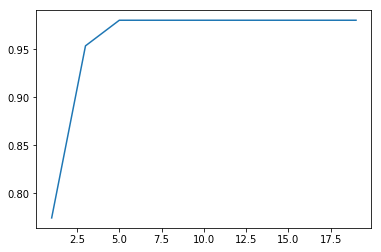

In [54]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot([1,3,5,7,9,11,13,15,17,19], MSE_LIST)